<h1 style="text-align: center;"><span style="color: #340a5c"> EC DV - GT CC - Seconde tentative : Toulouse-Blagnac </span></h1>

<h2> <span style="color: #810cb3"> Sommaire </span> </h2>

* [Packages et Import des données](#Packages_Import_Donnees)
    * [Packages](#Packages)
    * [Import des données](#Import_Donnees)
        * [Import des données de la station Toulouse-Blagnac](#Import_Toulouse_Blagnac)
        * [Description simple des données](#Description_Simple)
        * [Compréhension des données](#Comprehension_Donnees)

* [Première analyse](#Premiere_Analyse)
    * [Valeurs manquantes](#Valeurs_Manquantes)
    * [Fortes corrélations](#Fortes_Correlations)
    * [Sélection de la variable à prédire](#Selection_Variable_Predire)
        * [Variables axées sur la vitesse de vent](#Variables_Vent)
        * [Choix de la variable](#Choix_Variable)
        * [Tests pour confirmer le choix](#Test_Choix)
        * [Nombre de tempêtes](#Nombre_Tempetes)
    * [Sélection des variables à conserver](#Selection_Variable_Conserver)
        * [Variables retirées](#Variables_Retirees)
        * [Variables conservées](#Variables_Conservees)
    
* [Retraitement](#Retraitement)
    * [Mise en forme des données](#Mise_Forme_Donnees)
        * [Suppression des variables](#Suppression_Variables)
        * [Renommage des variables](#Renommage_Variables)
    * [Titre provisoire : Valeurs aberrantes - NaN - Ligne 19785](#Titre_Provisoire)
    * [Transformation par étape](#Transformation_Etape)
        * [Retraitement des dates](#Retraitement_Dates)
        * [Retraitement en °C](#Retraitement_C)
        * [Retraitement en km/h](#Retraitement_km/h)
        * [Retraitement du catégoriel](#Retraitement_Categoriel)
        * [Retraitement du numérique](#Retraitement_Numerique)
    * [Transformation unique via Pipeline](#Transformation_Pipeline)

<h2> <span style="color: #810cb3"> Packages et Import des données </span> </h2> <a class="anchor" id="Packages_Import_Donnees"></a>

<h3> <span style="color: #b205fc"> Packages </span> </h3> <a class="anchor" id="Packages"></a>

In [179]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
from datetime import timedelta
import calendar
import seaborn as sns
import scipy
from scipy import stats
%matplotlib inline
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests #Causality Testing

from statsmodels.tsa.stattools import adfuller
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

import joblib
from joblib import Parallel, delayed
import multiprocessing

from datetime import datetime
#from jyquickhelper import add_notebook_menu

import missingno as msno

from datetime import datetime
import pytz  # Pour gérer les décalages horaires
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<h3> <span style="color: #b205fc"> Import des données </span> </h3> <a class="anchor" id="Import_Donnees"></a>

<h4> Import des données de la station Toulouse-Blagnac </h4> <a class="anchor" id="Import_Toulouse_Blagnac"></a>

Lien de téléchargement des données (choisir "Seulement les 40361 enregistrements sélectionnés" et le format CSV) :   https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/export/?sort=date&refine.nom=TOULOUSE-BLAGNAC&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6InJyMSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNGRjUxNUEifV0sInhBeGlzIjoiZGF0ZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6ImRheSIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6ImRvbm5lZXMtc3lub3AtZXNzZW50aWVsbGVzLW9tbSIsIm9wdGlvbnMiOnsic29ydCI6ImRhdGUiLCJsb2NhdGlvbiI6IjIyLDQzLjYyMSwxLjM3ODgzIiwiYmFzZW1hcCI6Imphd2cubGlnaHQifX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=22,43.621,1.37883&basemap=jawg.light

In [107]:
path=r"C:\Users\mathis.ouali\OneDrive - Optimind\Mes documents\003) 02_2023 _ GT Changement climatique\Toulouse-Blagnac - NEW\Données\Opendatasoft_Toulouse-Blagnac.csv"
data = pd.read_csv(path, sep=";") #Le séparateur du csv ici est le point virgule

data.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,7630,2010-01-23T07:00:00+01:00,101960.0,30.0,3.0,150.0,3.6,277.25,272.65,72.0,...,151,Blagnac,31069,Toulouse Métropole,243100518,Haute-Garonne,31,Occitanie,76,1
1,7630,2010-04-30T08:00:00+02:00,101690.0,0.0,5.0,280.0,3.6,286.55,284.75,89.0,...,151,Blagnac,31069,Toulouse Métropole,243100518,Haute-Garonne,31,Occitanie,76,4
2,7630,2010-04-30T17:00:00+02:00,101390.0,-130.0,8.0,10.0,2.6,291.45,284.95,66.0,...,151,Blagnac,31069,Toulouse Métropole,243100518,Haute-Garonne,31,Occitanie,76,4
3,7630,2010-04-30T23:00:00+02:00,101360.0,30.0,3.0,110.0,2.6,289.45,285.95,80.0,...,151,Blagnac,31069,Toulouse Métropole,243100518,Haute-Garonne,31,Occitanie,76,4
4,7630,2010-03-14T04:00:00+01:00,102860.0,-30.0,8.0,270.0,5.1,274.85,269.95,70.0,...,151,Blagnac,31069,Toulouse Métropole,243100518,Haute-Garonne,31,Occitanie,76,3


<h4> Description simple des données </h4> <a class="anchor" id="Description_Simple"></a>

In [4]:
data.describe()

,ID OMM station,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,...,Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,communes (code),EPCI (code),department (code),region (code),mois_de_l_annee
count,40225.0,40183.000000,40210.000000,40212.000000,40193.000000,40193.000000,40183.000000,40183.000000,40183.000000,39850.000000,...,0.0,27411.000000,4.022500e+04,4.022500e+04,40225.0,40225.0,40225.0,40225.0,40225.0,40225.000000
mean,7630.0,101807.206779,0.129321,4.349498,218.897072,3.837683,287.685674,281.981822,71.921634,27474.022836,...,NaN,10.526219,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,6.449671
std,0.0,769.783792,117.160560,2.712589,90.742306,2.408348,7.697892,5.595147,18.381305,15989.410525,...,NaN,6.523854,2.871339e-11,7.660634e-13,0.0,0.0,0.0,0.0,0.0,3.424360
min,7630.0,97960.000000,-800.000000,0.000000,0.000000,0.000000,260.850000,257.350000,13.000000,50.000000,...,NaN,-15.000000,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,1.000000
25%,7630.0,101380.000000,-70.000000,2.000000,140.000000,2.000000,282.150000,278.250000,59.000000,15000.000000,...,NaN,5.700000,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,3.000000
50%,7630.0,101810.000000,0.000000,5.000000,250.000000,3.400000,287.250000,282.250000,76.000000,25000.000000,...,NaN,10.100000,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,6.000000
75%,7630.0,102270.000000,70.000000,7.000000,290.000000,5.300000,293.050000,286.250000,87.000000,39950.000000,...,NaN,15.700000,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,9.000000
max,7630.0,104300.000000,950.000000,8.000000,360.000000,18.700000,315.450000,297.450000,100.000000,60000.000000,...,NaN,30.500000,4.362100e+01,1.378833e+00,151.0,31069.0,243100518.0,31.0,76.0,12.000000


In [30]:
print("Nombre de features : " + str(data.shape[1]) + "\n")
print("Nombre de lignes : " + str(data.shape[0]) + "\n")
print(data.columns)

Nombre de features : 82

Nombre de lignes : 40225

Index(['ID OMM station', 'Date', 'Pression au niveau mer',
       'Variation de pression en 3 heures', 'Type de tendance barométrique',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Température', 'Point de rosée', 'Humidité', 'Visibilité horizontale',
       'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale',
       'Nébulosité  des nuages de l' étage inférieur',
       'Hauteur de la base des nuages de l'étage inférieur',
       'Type des nuages de l'étage inférieur',
       'Type des nuages de l'étage moyen',
       'Type des nuages de l'étage supérieur', 'Pression station',
       'Niveau barométrique', 'Géopotentiel',
       'Variation de pression en 24 heures',
       'Température minimale sur 12 heures',
       'Température minimale sur 24 heures',
       'Température maximale sur 12 heures',
       'Température maximale sur 24 heures',
       'Température minimale du sol sur 1

Le dataset présente 40225 lignes. De plus, il est composé de 82 features. On souhaite comprendre lesquelles vont nous intéresser : quelle variable doit-on prédire si l'on veut étudier la vitesse de vent et quelles variables doit-on conserver pour cette prédiction ?

<h4> Compréhension des données </h4> <a class="anchor" id="Comprehension_Donnees"></a>

Pour comprendre les données, une documentation est fournie. Elle permet d'obtenir pricnipalement le type des données (car, int ou réel) et les unités dans lesquelles elles sont exprimées.  
Voici le lien : https://donneespubliques.meteofrance.fr/client/document/doc_parametres_synop_167.pdf

De plus, certaines variables catégorielles sont exprimées en int, leur correspondance est définie dans des tables code.  
Voici la liste :  

| Feature liée | Numéro code | Lien |
|-|-|-|
| Type de tendance barométrique | 0200 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO0200.HTM |
| Temps présent | 4677 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM |
| Temps passé 1 & 2 | 4561 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4561.HTM |
| Type de nuages de l'étage inférieur | 0513 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO0513.HTM |
| Type des nuages de l'étage moyen | 0515 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO0515.HTM |
| Type des nuages de l'étage supérieur | 0509 | https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO0509.HTM |
| Méthode mesure tw | 3855 | Not found |
| Etat du sol | 0901 | Not found |
| Phénomène spécial | 3778 | Not found |
| Type nuage N | 0500 | Not found |


<h2> <span style="color: #810cb3"> Première analyse </span> </h2> <a class="anchor" id="Premiere_Analyse"></a>

<h3> <span style="color: #b205fc"> Valeurs manquantes </span> </h3> <a class="anchor" id="Valeurs_Manquantes"></a>

Premièrement, regardons le nombre de valeurs disponibles par features. Cela peut être intéressant pour la sélection des variabels à conserver. En effet, un nombre trop faible de valeurs pourrait nous amener à ne pas conserver certaines variables.

In [39]:
print("Nombre de valeurs par features et pourcentage de valeurs disponibles" + "\n")
for colonne in data.columns:
    nombre_valeurs_manquantes = data[colonne].isnull().sum()
    print(f'{colonne} : {40225-nombre_valeurs_manquantes} | {round(((40225-nombre_valeurs_manquantes)/40225)*100,2)}%')

Nombre de valeurs par features et pourcentage de valeurs disponibles

ID OMM station : 40225 | 100.0%
Date : 40225 | 100.0%
Pression au niveau mer : 40183 | 99.9%
Variation de pression en 3 heures : 40210 | 99.96%
Type de tendance barométrique : 40212 | 99.97%
Direction du vent moyen 10 mn : 40193 | 99.92%
Vitesse du vent moyen 10 mn : 40193 | 99.92%
Température : 40183 | 99.9%
Point de rosée : 40183 | 99.9%
Humidité : 40183 | 99.9%
Visibilité horizontale : 39850 | 99.07%
Temps présent : 40147 | 99.81%
Temps passé 1 : 9571 | 23.79%
Temps passé 2 : 9410 | 23.39%
Nebulosité totale : 25124 | 62.46%
Nébulosité  des nuages de l' étage inférieur : 34229 | 85.09%
Hauteur de la base des nuages de l'étage inférieur : 28509 | 70.87%
Type des nuages de l'étage inférieur : 9716 | 24.15%
Type des nuages de l'étage moyen : 9361 | 23.27%
Type des nuages de l'étage supérieur : 9296 | 23.11%
Pression station : 40223 | 100.0%
Niveau barométrique : 0 | 0.0%
Géopotentiel : 0 | 0.0%
Variation de pression e

On peut également utiliser le package "msno" de manière à visualiser les valeurs manquantes du dataset. Ici, on l'utilisera sur les colonnes du dataset et non sur l'entièreté des données à cause du trop grand nombre de features.  
Ainsi, ce package permet de voir où se situent les valeurs manquantes et le pourcentage de valeurs disponibles.

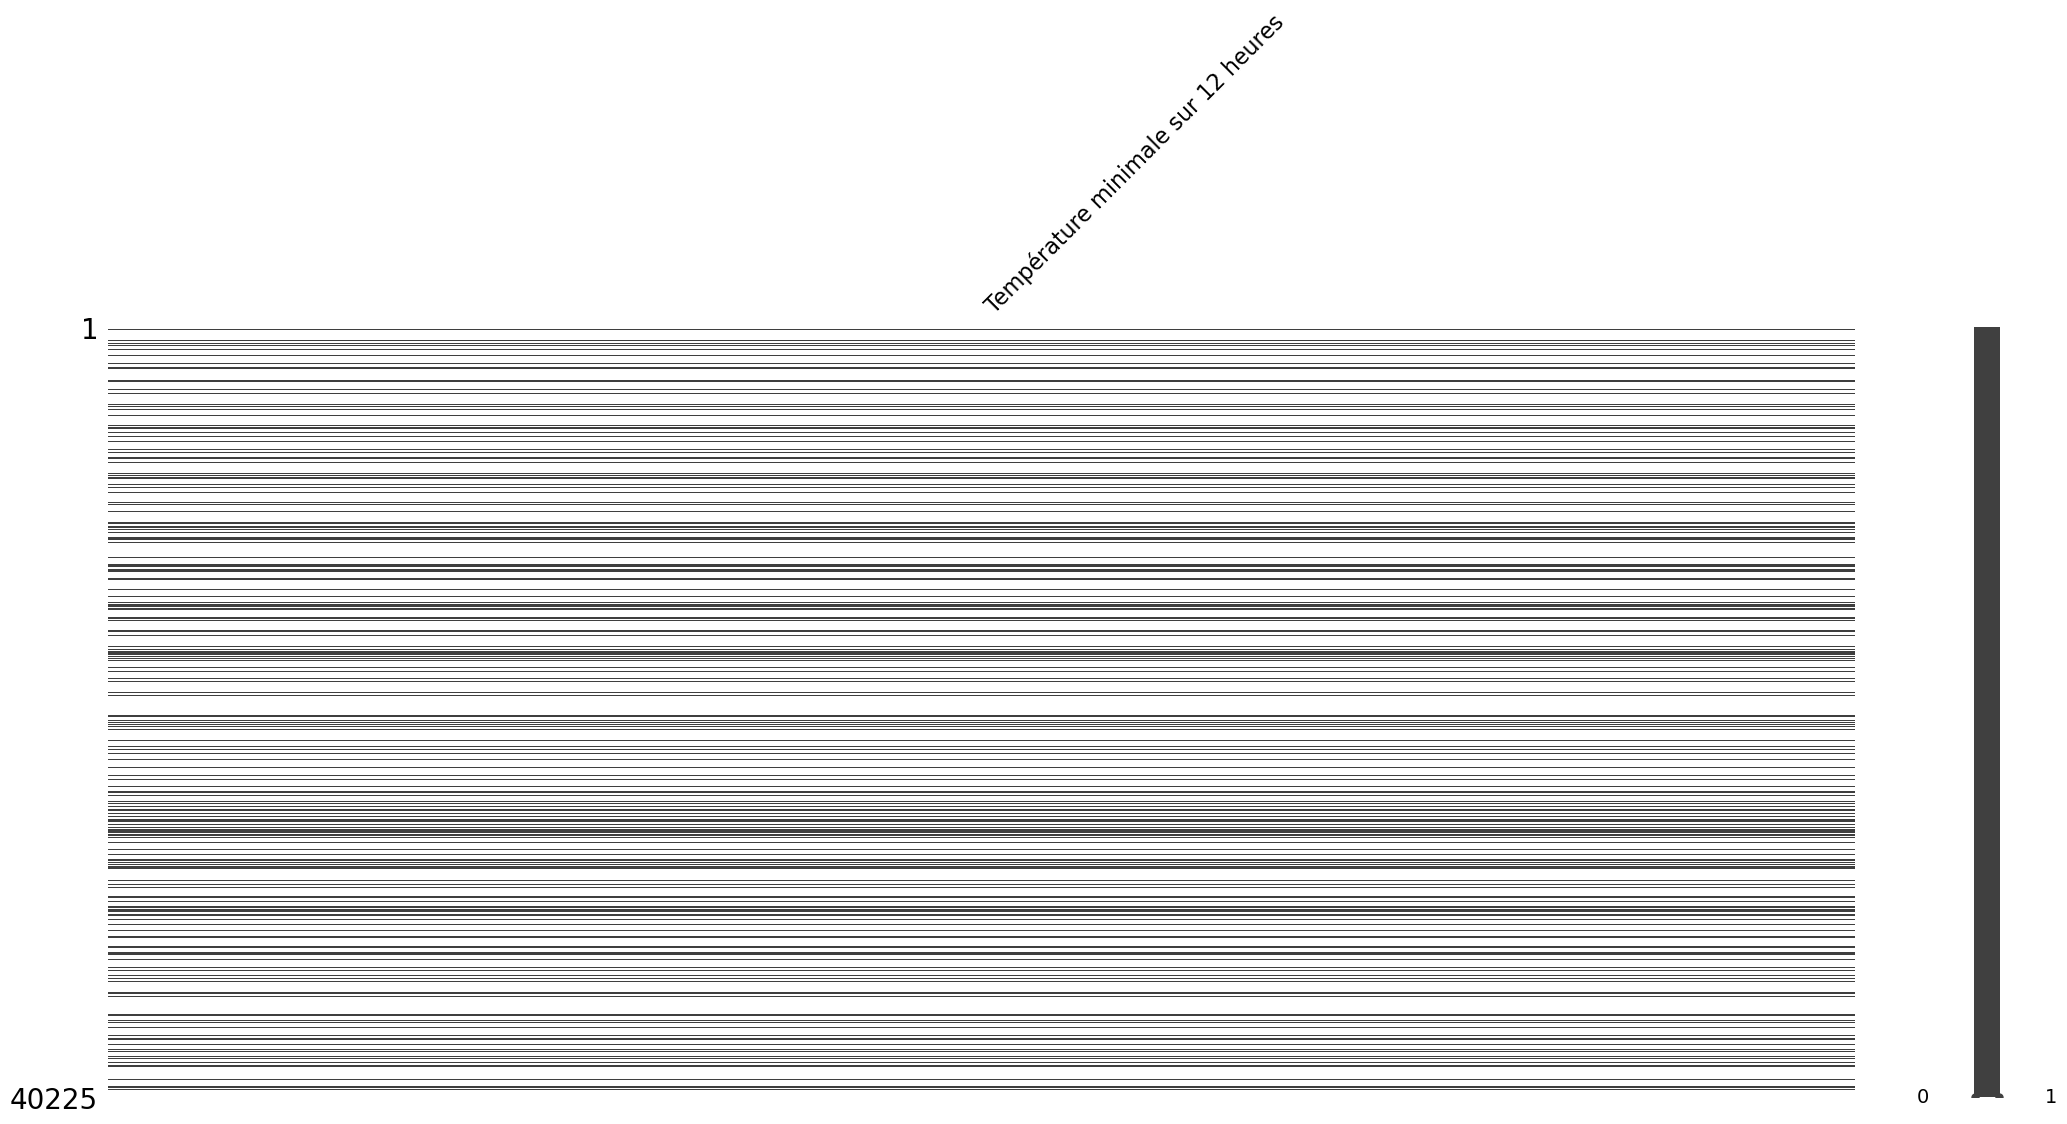

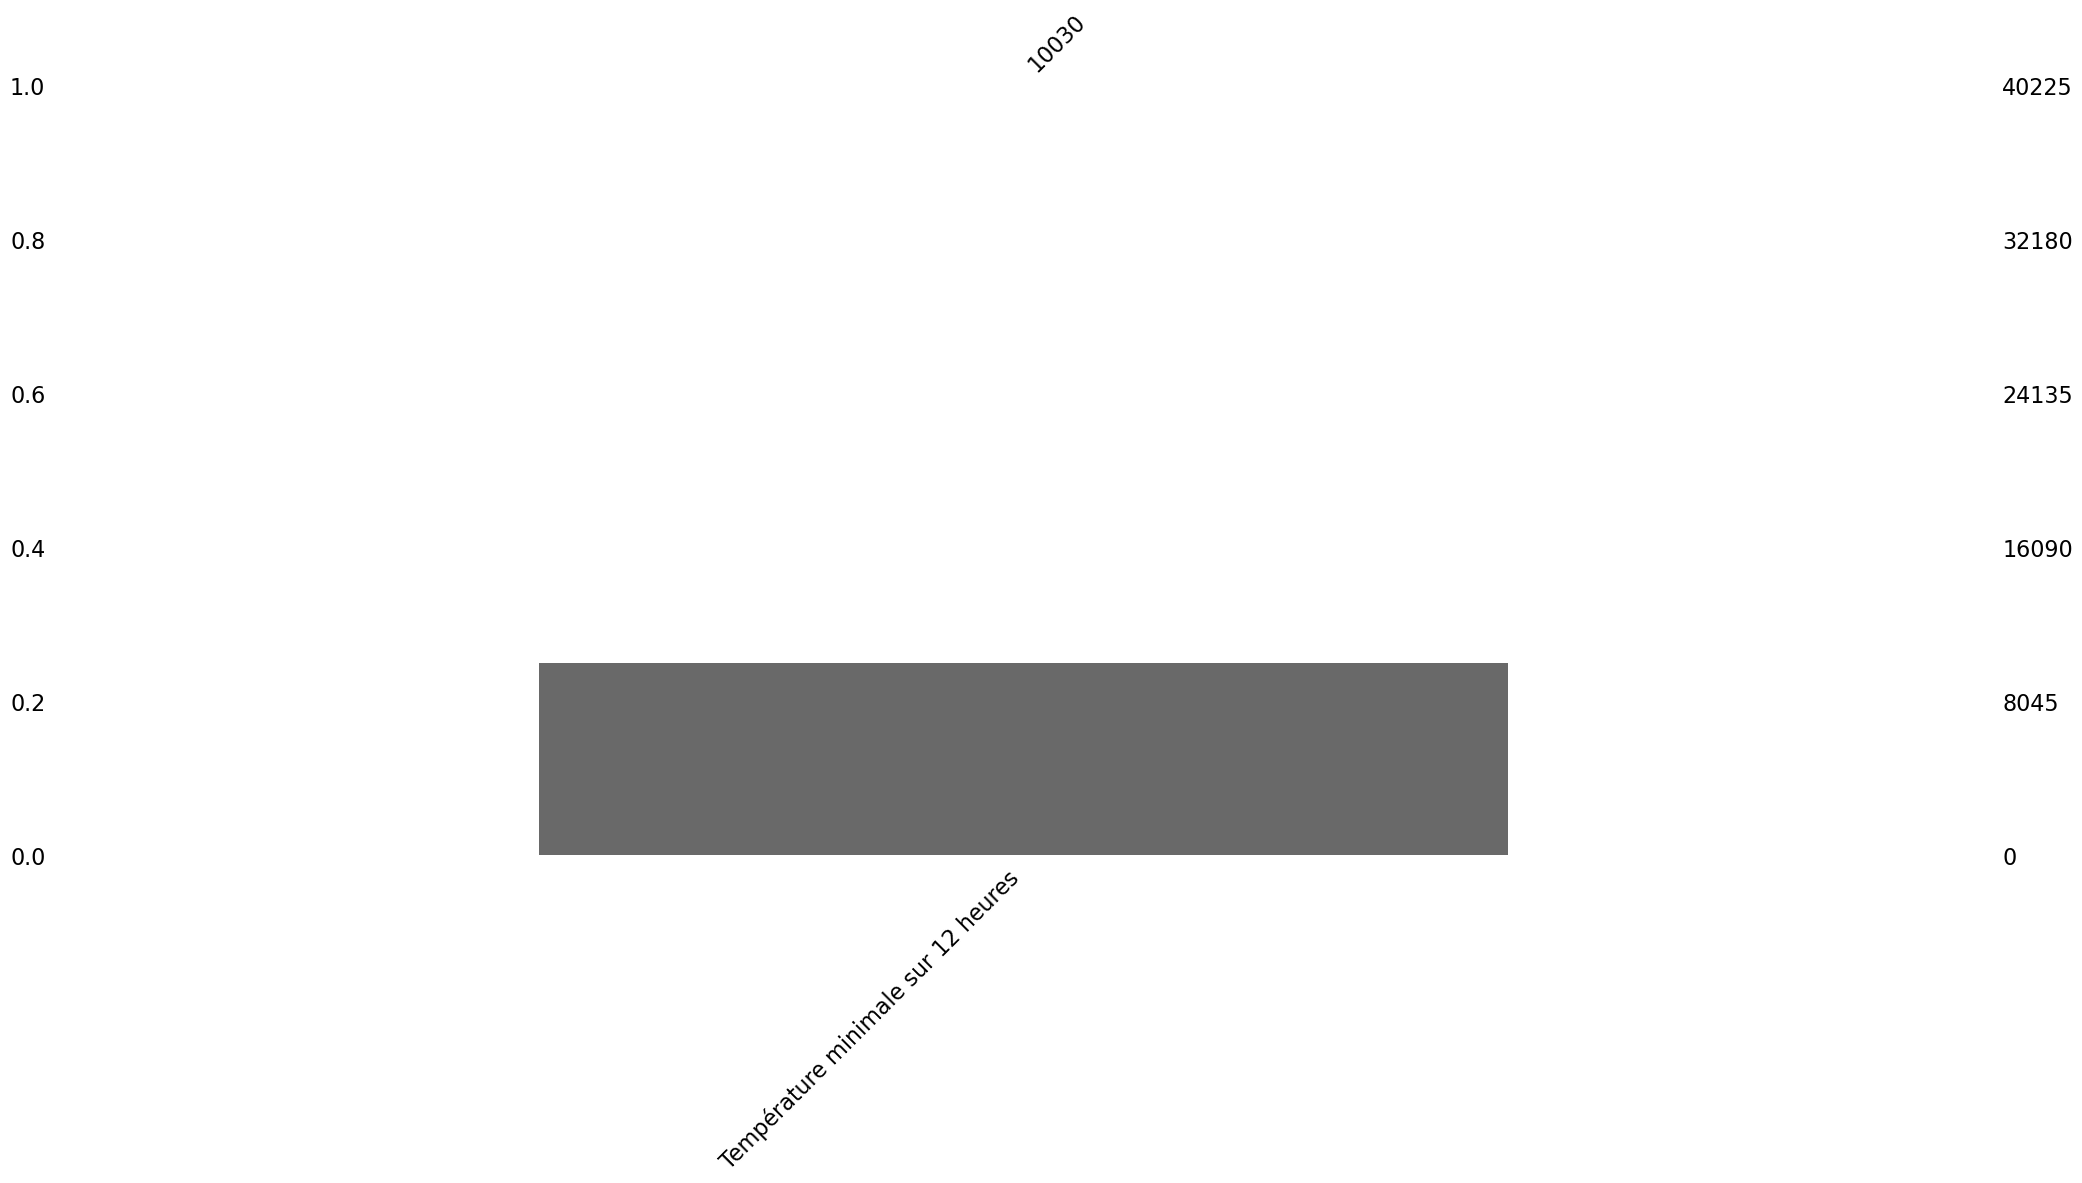

In [43]:
num=24 #pour appeler les colonnes via leur position
# feat="Temps présent" #pour appeler les colonnes via leur nom

col_data = pd.DataFrame(data.iloc[:, num]) #via la position
# col_data = data[[feat]] #via le nom
col_data.head()
msno.matrix(col_data)
plt.show()
msno.bar(col_data)
plt.show()

<h3> <span style="color: #b205fc"> Fortes corrélations </span> </h3> <a class="anchor" id="Fortes_Correlations"></a>

Regardons désormais les corrélations entre les variables. Une forte corrélation entre deux variables peut nous amener à ne pas conserver l'une d'entre elles. En effet, si les deux variables sont conservées, la seconde n'apportera pas tellement d'information complémentaire lors de l'apprentissage. On se fixe alors 0.8 et -0.8 comme seuil de corrélation.  
De même ici, on préfèrera une présentation ligne à ligne des fortes corrélations plutôt qu'une matrice de corrélation à cause du trop grand nombre de features.

In [47]:
# Calcul de la matrice de corrélation
matrice_correlation = data.corr()

# Définissez un seuil de corrélation (80% en tant que décimale, soit 0.8)
seuil_correlation_down = -0.8
seuil_correlation_up = 0.8

# Boucle sur les colonnes pour afficher les corrélations supérieures au seuil
for colonne1 in matrice_correlation.columns:
    for colonne2 in matrice_correlation.columns:
        if colonne1 != colonne2:
            correlation = matrice_correlation[colonne1][colonne2]
            if correlation < seuil_correlation_down or correlation > seuil_correlation_up:
                print(f"{colonne1} <-> {colonne2} : {round(correlation,2)}")

C:\Users\mathis.ouali\AppData\Local\Temp\ipykernel_17864\2442540370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = data.corr()


Pression au niveau mer <-> Pression station : 1.0
Vitesse du vent moyen 10 mn <-> Rafale sur les 10 dernières minutes : 0.98
Vitesse du vent moyen 10 mn <-> Rafales sur une période : 0.94
Température <-> Température minimale sur 12 heures : 0.87
Température <-> Température maximale sur 12 heures : 0.93
Température <-> Température minimale du sol sur 12 heures : 0.83
Température <-> Température (°C) : 1.0
Température <-> Température minimale sur 12 heures (°C) : 0.87
Température <-> Température maximale sur 12 heures (°C) : 0.93
Température <-> Température minimale du sol sur 12 heures (en °C) : 0.83
Point de rosée <-> Température minimale sur 12 heures : 0.9
Point de rosée <-> Température minimale du sol sur 12 heures : 0.87
Point de rosée <-> Température minimale sur 12 heures (°C) : 0.9
Point de rosée <-> Température minimale du sol sur 12 heures (en °C) : 0.87
Temps passé 1 <-> Temps passé 2 : 0.84
Temps passé 2 <-> Temps passé 1 : 0.84
Hauteur de la base des nuages de l'étage infér

<h3> <span style="color: #b205fc"> Sélection de la variable à prédire </span> </h3> <a class="anchor" id="Selection_Variable_Predire"></a>

<h4> Variables axées sur la vitesse de vent </h4> <a class="anchor" id="Variables_Vent"></a>

Après avoir rapidement exploré les valeurs manquantes et les corrélations. Commencons par comrpendre quelle variable nous souhaitons prédire. Une fois ce choix fait, nous pourrons nous focaliser sur les variables à conserver pour la prédiction de la variable retenue.

Le but de ce GT est la prédiction de tempêtes. En d'autres termes, nous allons nous intéresser à la vitesse de vent. Ici, 3 variables concernent la vitesse de vent. Observons le dataset restreint à ces 3 variables.

In [53]:
data_vent = data[["Vitesse du vent moyen 10 mn","Rafale sur les 10 dernières minutes","Rafales sur une période"]]
data_vent.head(20)

,Vitesse du vent moyen 10 mn,Rafale sur les 10 dernières minutes,Rafales sur une période
0,3.6,NaN,6.7
1,3.6,NaN,4.6
2,2.6,NaN,4.1
3,2.6,NaN,5.1
4,5.1,NaN,7.7
5,1.5,NaN,2.6
6,4.1,NaN,7.2
7,2.6,NaN,7.2
8,3.1,NaN,4.6
9,1.5,NaN,2.6


<h4> Choix de la variable </h4> <a class="anchor" id="Choix_Variable"></a>

Au premier abord, le choix semble se diriger vers la prédiction de la variable "Rafales sur une période". En effet, le grand nombre de NaN dans "Rafale sur les 10 dernières minutes" nous incite à aller voir les pourcentages de valeurs disponibles. On a alors le tableau suivant :

| Feature liée | Pourcentage de valeurs disponibles |
|-|-|
| Vitesse du vent moyen 10 mn | 99.92% |
| Rafale sur les 10 dernières minutes | 64.72% |
| Rafales sur une période | 99.85% |

Ainsi, on comprend que l'étude de la variable rafale sur les 10 dernières minutes semble compliquée au vu du faible nombre de valeurs recensées. De plus, selon Météo France, "on parle de rafales lorsque la vitesse du vent instantané dépasse celle du vent moyen de plus de 10 nœuds (soit 18 km/h)". On comprend donc que les valeurs NaN doivent témoigner d'une abscence de cette hausse soudaine sur 10 minutes.  
Cependant, lorsque l'on se focalise sur la variable "Rafales sur une période" on observe une quasi totalité de variables disponibles. Cela doit provenir du fait que la période observée n'est plus 10 minutes et doit être plus longue. Ceci dit, nous n'avons aucune information sur la durée de cette période.  
Enfin, que peut-on observer sur la variable "Vitesse du vent moyen 10 mn" ? Tout simplement qu'il s'agit d'une moyenne sur 10 minutes et donc par le phénomène de moyenne, les vitesses importantes seront lissées.  

On en conlut alors que, pour un aspect actuariel, nous retiendrons "Rafales sur une période" comme étant la variable à prédire. Effectivement, ce sont les vitesses de vent maximales qui causeront des dégâts et non pas les vitesses de vent moyenne. Avec un regard axé sur les rafales nous obtenons cette information, chose qui n'est pas possible avec la vitesse moyenne. 

On propose tout de même quelques tests pour s'assurer de la bonne compréhension des 3 variables.

<h4> Tests pour confirmer le choix </h4> <a class="anchor" id="Test_Choix"></a>

Création d'un dataframe proposant le delta de vitesse entre "Rafales sur une période" et "Vitesse du vent moyen sur 10 mn" puis entre "Rafales sur une période" et "Rafale sur les 10 dernières minutes".

In [60]:
delta_vent = pd.DataFrame()
delta_vent["Delta : Rafales période - Vitesse moyenne"] = data_vent["Rafales sur une période"] - data_vent["Vitesse du vent moyen 10 mn"]
delta_vent["Delta : Rafales période - Rafale 10mn"] = data_vent["Rafales sur une période"] - data_vent["Rafale sur les 10 dernières minutes"]
delta_vent.head()

,Delta : Rafales période - Vitesse moyenne,Delta : Rafales période - Rafale 10mn
0,3.1,NaN
1,1.0,NaN
2,1.5,NaN
3,2.5,NaN
4,2.6,NaN


Dans ce dataframe contenant les 2 delta, on souhaite vérifier que la variable "Rafales sur une période" a toujours une valeur plus élevée que les variables "Rafale sur les 10 dernières minutes" et "Vitesse du vent moyen sur 10 mn".

In [78]:
nb_neg_vitesse = (delta_vent["Delta : Rafales période - Vitesse moyenne"] < 0).sum()
print(nb_neg_vitesse)

1


In [81]:
nb_neg_raf10 = (delta_vent["Delta : Rafales période - Rafale 10mn"] < 0).sum()
print(nb_neg_raf10)

1


On voit que, sur tout le dataset de delta, une seule ligne présente une anomalie pour chacune des variables. Observons cette ligne pour chaque delta.

In [80]:
ligne_negative_vitesse = delta_vent.loc[delta_vent["Delta : Rafales période - Vitesse moyenne"] < 0]
print(ligne_negative_vitesse)

       Delta : Rafales période - Vitesse moyenne  \
19785                                       -8.2   

       Delta : Rafales période - Rafale 10mn  
19785                                  -18.0  


In [82]:
ligne_negative_raf10 = delta_vent.loc[delta_vent["Delta : Rafales période - Rafale 10mn"] < 0]
print(ligne_negative_raf10)

       Delta : Rafales période - Vitesse moyenne  \
19785                                       -8.2   

       Delta : Rafales période - Rafale 10mn  
19785                                  -18.0  


Il s'agit de la même ligne pour les deux deltas à savoir la ligne 19785. Obserovns cette ligne dans le dataset de vent.

In [84]:
data_vent.iloc[19785]

Vitesse du vent moyen 10 mn            11.3
Rafale sur les 10 dernières minutes    21.1
Rafales sur une période                 3.1
Name: 19785, dtype: float64

On constate alors que cette ligne n'est pas cohérente. En effet la vitesse du vent moyen était de 40.7 km/h (= 3.6 x 11.3). Par définition, une rafale est un écart d'au-minimum 18 km/h de la vitesse de vent instantanée à la vitesse de vent moyenne. Ici, la vitesse de vent instantanée (dite rafale) est de seulement 11.2 km/h (= 3.6 x 3.1).  
De plus, lorsque l'on regarde la rafale sur les 10 dernières minutes, on obtient une vitesse de 76.0 km/h (=3.6 x 21.1). On comprend donc que la variable "Rafales sur une période" est erronée pour la ligne 19785. Le retraitement consistera à attribuer la valeur de la variable "Rafale sur les 10 dernières minutes" à notre variable "Rafales sur une période".

Ce test nous réconforte sur le fait de choisir "Rafales sur une période" comme étant la variable à prédire. Pour finir ces vérifications minimes, observons le nombre de tempêtes dans le dataset de vent.

<h4> Nombre de tempêtes </h4> <a class="anchor" id="Nombre_Tempetes"></a>

In [93]:
print("Nombre de tempêtes - Vent moyen 10 mn : " + str((data_vent["Vitesse du vent moyen 10 mn"] > 25).sum())) #25m/s = 90km/h = Seuil rafale
print("Nombre de tempêtes - Rafale 10 mn : " + str((data_vent["Rafale sur les 10 dernières minutes"] > 25).sum()))
print("Nombre de tempêtes - Rafales période : " + str((data_vent["Rafales sur une période"] > 25).sum()))

Nombre de tempêtes - Vent moyen 10 mn : 0
Nombre de tempêtes - Rafale 10 mn : 24
Nombre de tempêtes - Rafales période : 63


Ce dernier test nous montre encore une fois que prédire la variable "Rafales sur une période" est le choix adéquat. En effet, c'est la variable liée à la vitesse de vent qui présente le plus de "tempêtes" (attention les tempêtes sont caractérisées par une vitesse de vent moyenne et non pas instantanée mais comme expliqué précédemment ce sont ces rafales et donc les vitesses de vent instantanées qui provoquent le plus de dégât. De plus, en météorologie, lors des alertes tempêtes on parle en termes de pointes de vitesse de vent et non en terme de vitesse de vent moyenne).  
Ainsi, notre dataset présentera 0.16% (= 63 / 40225) rafales supérieures à 90 km/h ce qui est plutôt faible. Gardons-le en tête.

<h3> <span style="color: #b205fc"> Sélection des variables à conserver </span> </h3> <a class="anchor" id="Selection_Variable_Conserver"></a>

Désormais, nous savons que la variable à prédire est "Rafales sur une période". Nous souhaitons comprendre quelles sont les variables à conserver pour la prédiction. Pour rappel, nous avons déjà sorti le nombre de valeurs disponibles par variable et les fortes corrélations entre elles. Cela va nous aider dans nos décisions.  
Après une étude des 82 variables. Voici les choix qui ont été faits.

<h4> Variables retirées </h4> <a class="anchor" id="Variables_Retirees"></a>

|	Features éliminées	|	Raison simplifiée	|
|-|-|
|	ID OMM station	|	Variable géographique	|
|	Variation de pression en 3 heures	|	Delta entre deux relevés donne variation sur 3 heures	|
|	Pression au niveau mer	|	Déjà dans 'Pression station' + Correl = 1 + Nb de données moins élevé	|
|	Direction du vent moyen 10 mn	|	A priori, pas de lien avec vitesse de vent	|
|	Vitesse du vent moyen 10 mn	|	Expliqué ci-dessus, conservation de 'Rafales sur une période'	|
|	Température	|	Déjà dans 'Température (°C)'	|
|	Point de rosée	|	Forte corrélation aux températures minimales	|
|	Visibilité horizontale	|	A priori, pas de lien avec vitesse de vent	|
|	Temps présent	|	Intéressant mais trop grand nombre de catégories (≈53) + difficile de l'avoir dans le forecast	|
|	Temps passé 1	|	Description de la météo trop simplifiée	|
|	Temps passé 2	|	Description de la météo trop simplifiée	|
|	Nebulosité totale	|	A priori, pas de lien avec vitesse de vent	|
|	Nébulosité des nuages de l' étage inférieur	|	A priori, pas de lien avec vitesse de vent	|
|	Hauteur de la base des nuages de l'étage inférieur	|	A priori, pas de lien avec vitesse de vent	|
|	Type des nuages de l'étage inférieur	|	Trop peu de données	|
|	Type des nuages de l'étage moyen	| Trop peu de données |
|	Type des nuages de l'étage supérieur	|	Trop peu de données	|
|	Niveau barométrique	|	Pas de valeurs	|
|	Géopotentiel	|	Pas de valeurs	|
|	Variation de pression en 24 heures	|	Déjà dans 'Variation de pression en 3 heures'	|
|	Température minimale sur 12 heures	|	Disponible en °C	|
|	Température minimale sur 24 heures	|	Disponible en °C	|
|	Température maximale sur 12 heures	|	Disponible en °C	|
|	Température maximale sur 24 heures	|	Disponible en °C	|
|	Température minimale du sol sur 12 heures	|	Disponible en °C	|
|	Méthode de mesure Température du thermomètre mouillé	|	Pas de valeurs	|
|	Température du thermomètre mouillé	|	Pas de valeurs	|
|	Rafale sur les 10 dernières minutes	|	Expliqué ci-dessus, conservation de 'Rafales sur une période'	|
|	Periode de mesure de la rafale	|	Toujours égale à -10.0	|
|	Etat du sol	|	A priori, pas de lien avec vitesse de vent	|
|	Hauteur totale de la couche de neige, glace, autre au sol	|	A priori, pas de lien avec vitesse de vent	|
|	Hauteur de la neige fraîche	|	A priori, pas de lien avec vitesse de vent	|
|	Periode de mesure de la neige fraiche	|	A priori, pas de lien avec vitesse de vent	|
|	Précipitations dans la dernière heure	|	'Précipitations dans les 3 dernières heures' est plus complet	|
|	Précipitations dans les 6 dernières heures	|	Chevauchement des relevés (toutes les 3 heures)	|
|	Précipitations dans les 12 dernières heures	|	Déjà dans 'Précipitations dans les 3 dernières heures'	|
|	Précipitations dans les 24 dernières heures	|	Déjà dans 'Précipitations dans les 3 dernières heures'	|
|	Phénomène spécial 1	|	Corrélation à 1 avec 'Rafale sur les 10 dernières minutes'	|
|	Phénomène spécial 2	|	Par mesure de précaution	|
|	Phénomène spécial 3	|	Corrélation à 1 avec 'Phénomène spécial 2'	|
|	Phénomène spécial 4	|	Par mesure de précaution et faible nombre de données	|
|	Nébulosité couche nuageuse 1	|	A priori, pas de lien avec vitesse de vent	|
|	Type nuage 1	|	Déjà dans 'Type de nuages'	|
|	Hauteur de base 1	|	A priori, pas de lien avec vitesse de vent	|
|	Nébulosité couche nuageuse 2	|	A priori, pas de lien avec vitesse de vent	|
|	Type nuage 2	|	Déjà dans 'Type de nuages'	|
|	Hauteur de base 2	|	A priori, pas de lien avec vitesse de vent	|
|	Nébulosité couche nuageuse 3	|	A priori, pas de lien avec vitesse de vent	|
|	Type nuage 3	|	Déjà dans 'Type de nuages'	|
|	Hauteur de base 3	|	A priori, pas de lien avec vitesse de vent	|
|	Nébulosité couche nuageuse 4	|	A priori, pas de lien avec vitesse de vent	|
|	Type nuage 4	|	Déjà dans 'Type de nuages'	|
|	Hauteur de base 4	|	A priori, pas de lien avec vitesse de vent	|
|	Coordonnees	|	Variable géographique	|
|	Nom	|	Variable géographique	|
|	Type de tendance barométrique	|	Retranscription littérale de la variable du même nom	|
|	Temps passé 1	|	Retranscription littérale de la variable du même nom	|
|	Temps présent	|	Retranscription littérale de la variable du même nom	|
|	Température minimale sur 12 heures (°C)	|	Forte corrélation avec 'Température (°C)'	|
|	Température minimale sur 24 heures (°C)	|	Chevauchement des relevés (toutes les 3 heures)	|
|	Température maximale sur 12 heures (°C)	|	Forte corrélation avec 'Température (°C)'	|
|	Température maximale sur 24 heures (°C)	|	Chevauchement des relevés (toutes les 3 heures)	|
|	Température minimale du sol sur 12 heures (en °C)	|	Forte corrélation avec 'Température (°C)'	|
|	Latitude	|	Variable géographique	|
|	Longitude	|	Variable géographique	|
|	Altitude	|	Variable géographique	|
|	communes (name)	|	Variable géographique	|
|	communes (code)	|	Variable géographique	|
|	EPCI (name)	|	Variable géographique	|
|	EPCI (code)	|	Variable géographique	|
|	department (name)	|	Variable géographique	|
|	department (code)	|	Variable géographique	|
|	region (name)	|	Variable géographique	|
|	region (code)	|	Variable géographique	|
|	mois_de_l_annee	|	Déjà dans 'Date'	|

<h4> Variables conservées </h4> <a class="anchor" id="Variables_Conservees"></a>

|	Features conservées	|	Raison simplifiée	|	Opérations	| Pourcentage de données |
|-|-|-|-|
|	Date	|	Variable de base	|	A retraiter - Date	| 100.00% |
|	Type de tendance barométrique	|	Liée à la vitesse de vent (pression)	|	A retraiter - Catégorielle	| 99.97% |
|	Point de rosée	|	Variable de base (corrélée aux températures minimales)	|	A retraiter - Conversion en °C	| 99.90% |
|	Humidité	|	Variable de base	|	OK	| 99.90% |
|	Pression station	|	Liée à la vitesse de vent	|	OK	| ≈100.00% |
|	Rafales sur une période	|	Vitesse de vent	|	A prédire	| 99.85% |
|	Précipitations dans les 3 dernières heures	|	Relevé toutes les 3 heures : complément aux précipitations	|	OK	| 99.52% |
|	Température (°C)	|	Variable de base	|	OK	| 99.90% |

Ainsi, il nous reste 8 features : une à prédire et les sept autres pour pouvoir réaliser la prédiction. Certains retraitements doivent être effectués. C'est ce que nous allons faire dans la prochaine section.

<h2> <span style="color: #810cb3"> Retraitement </span> </h2> <a class="anchor" id="Retraitement"></a>

Nous allons désormais procéder au retraitement des variables dans différentes étapes. Le retraitement ser afait pas à pas afin d'être clair.

<h3> <span style="color: #b205fc"> Mise en forme des données </span> </h3> <a class="anchor" id="Mise_Forme_Donnees"></a>

<h4> Suppression des variables </h4> <a class="anchor" id="Suppression_Variables"></a>

Premièrement, conservons seulement les variables qui nous intéressent à savoir celles présentes ci-dessus.

In [276]:
data_mef = data[["Date","Type de tendance barométrique","Point de rosée","Humidité","Pression station","Rafales sur une période","Précipitations dans les 3 dernières heures","Température (°C)"]]
data_mef.head()

,Date,Type de tendance barométrique,Point de rosée,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Température (°C)
0,2010-01-23T07:00:00+01:00,3.0,272.65,72.0,100000.0,6.7,0.0,4.1
1,2010-04-30T08:00:00+02:00,5.0,284.75,89.0,99900.0,4.6,6.0,13.4
2,2010-04-30T17:00:00+02:00,8.0,284.95,66.0,99640.0,4.1,0.0,18.3
3,2010-04-30T23:00:00+02:00,3.0,285.95,80.0,99600.0,5.1,0.2,16.3
4,2010-03-14T04:00:00+01:00,8.0,269.95,70.0,100870.0,7.7,0.0,1.7


<h4> Renommage des variables </h4> <a class="anchor" id="Renommage_Variables"></a>

Une fois les bonnes features conservées, on souhaite renommer ces variables pour les manipuler plus facilement. Pour rappel, des abréviations existent déjà dans la feuille de présentation des variables (https://donneespubliques.meteofrance.fr/client/document/doc_parametres_synop_167.pdf) mais sont trop simplifiées pour les identifier facilement. On crée alors nos noms de variables.

In [277]:
data_mef.columns = ["Date","Tendance_baro","Point_rosee","Humidite","Pression","Rafales","Precipitations","Temperature"]
data_mef.head()

,Date,Tendance_baro,Point_rosee,Humidite,Pression,Rafales,Precipitations,Temperature
0,2010-01-23T07:00:00+01:00,3.0,272.65,72.0,100000.0,6.7,0.0,4.1
1,2010-04-30T08:00:00+02:00,5.0,284.75,89.0,99900.0,4.6,6.0,13.4
2,2010-04-30T17:00:00+02:00,8.0,284.95,66.0,99640.0,4.1,0.0,18.3
3,2010-04-30T23:00:00+02:00,3.0,285.95,80.0,99600.0,5.1,0.2,16.3
4,2010-03-14T04:00:00+01:00,8.0,269.95,70.0,100870.0,7.7,0.0,1.7


<h3> <span style="color: #b205fc"> Titre provisoire : Valeurs aberrantes - NaN - Ligne 19785 </span> </h3> <a class="anchor" id="Titre_Provisoire"></a>

<h5> <span style="color: #d111ae">
    
Traitements à réaliser ici :

- Ligne 19785 : Attribuer la valeur de "Rafale sur les 10 dernières minutes" à "Rafales sur une période" (nouvellement "Rafales"). Déjà évoqué dans la section "Tests pour confirmer le choix"
- Quel retraitement des NaN
- Quel retraitement des valeurs aberrantes
    
</span> </h5>

<h3> <span style="color: #b205fc"> Transformation par étape </span> </h3> <a class="anchor" id="Transformation_Etape"></a>

<h4> Retraitement des dates </h4> <a class="anchor" id="Retraitement_Dates"></a>

Ici, on souhaite convertir les dates pour qu'elles passent d'un format chaîne de caractère à un format date. En d'autres termes, Python va comprendre qu'il s'agit de dates. C'est important pour nos algorithmes qui se baseront sur les séries temporelles.  
On crée une fonction que l'on passera dans un transformer afin de l'appliquer à notre dataset et plus précisément à la variable "Date".

In [278]:
# Fonction personnalisée pour convertir une chaîne de date en objet datetime
def convert_to_datetime(series):
    datetime_series = series.apply(lambda x: pd.to_datetime(x, format="%Y-%m-%dT%H:%M:%S%z"))
    return pd.DataFrame(datetime_series)

# Créez une instance de FunctionTransformer avec la fonction personnalisée
transformer_date = FunctionTransformer(func=convert_to_datetime, validate=False)

# # Appliquez le transformer à la colonne "Date" du DataFrame
# data_mef["Date"] = transformer_date.transform(data_mef["Date"])
# print(type(data_mef["Date"].iloc[0]))
# data_mef.head()

Le type est bien "Timestamp". Il s'agit d'un type proche de datetime mais plus intéressant ici car ce format prend en considération le décalage horaire. La conversion a été effectuée avec succès. On trie alors les données par ordre chronologique.

In [118]:
data_mef = data_mef.sort_values(by="Date")

# Réinitialisez les indices si nécessaire
data_mef = data_mef.reset_index(drop=True)

# Affichez le DataFrame trié
data_mef.head()

,Date,Tendance_baro,Point_rosee,Humidite,Pression,Rafales,Precipitations,Temperature
0,2010-01-01 01:00:00+01:00,2.0,278.45,87.0,97550.0,15.4,3.0,7.3
1,2010-01-01 04:00:00+01:00,3.0,275.95,72.0,97580.0,17.5,0.4,7.5
2,2010-01-01 07:00:00+01:00,3.0,274.85,67.0,97670.0,20.1,0.0,7.4
3,2010-01-01 10:00:00+01:00,3.0,276.45,83.0,98050.0,19.0,0.0,6.0
4,2010-01-01 13:00:00+01:00,1.0,277.15,80.0,98300.0,13.9,0.2,7.2


<h4> Retraitement en °C </span> </h4> <a class="anchor" id="Retraitement_C"></a>

"Point_rosee" est une variable en °K, on souhaite la transformer en °C pour avoir une cohérence avec la variable "Temperature".  
On crée une fonction que l'on passera dans un transformer afin de l'appliquer à notre dataset et plus précisément à la variable "Point_rosee".

In [279]:
# Fonction personnalisée pour convertir une chaîne de date en objet datetime
def convert_to_celsius(series):
    celsius_series = series.apply(lambda x: x-273.15)
    return pd.DataFrame(celsius_series)

# Créez une instance de FunctionTransformer avec la fonction personnalisée
transformer_celsius = FunctionTransformer(func=convert_to_celsius, validate=False)

# # Appliquez le transformer à la colonne "Point_rosee" du DataFrame
# data_mef["Point_rosee"] = transformer_celsius.transform(data_mef["Point_rosee"])
# data_mef.head()

<h4> Retraitement en km/h </h4> <a class="anchor" id="Retraitement_km/h"></a>

De même, la variable "Rafales" est représentée en m/s. Pour que cela soit plus parlant, on la convertit en km/h.  
On crée une fonction que l'on passera dans un transformer afin de l'appliquer à notre dataset et plus précisément à la variable "Rafales".

In [269]:
# Fonction personnalisée pour convertir une chaîne de date en objet datetime
def convert_to_kmh(series):
    kmh_series = series.apply(lambda x: x*3.6)
    return pd.DataFrame(kmh_series)

# Créez une instance de FunctionTransformer avec la fonction personnalisée
transformer_kmh = FunctionTransformer(func=convert_to_kmh, validate=False)

# # Appliquez le transformer à la colonne "Rafales" du DataFrame
# data_mef["Rafales"] = transformer_kmh.transform(data_mef["Rafales"])
# data_mef.head()

<h4> Retraitement du catégoriel </h4> <a class="anchor" id="Retraitement_Categoriel"></a>

La variable "Tendance_baro" est une variable catégorielle décomposée en 9 catégories (de 0 à 8). On la retraite afin que nos algorithmes comprennent qu'il s'agit de catégories. La correspondance des catégories est donnée ici : https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO0200.HTM.  
La méthode utilisée est le OneHotEncoder permettant de convertir notre unique colonne en 9 colonnes distinctes (une par catégorie) complétées chacune de 0/1 en fonction de la catégorie initiale pour chaque relevé.

In [280]:
transformer_cate = make_column_transformer((OneHotEncoder(),["Tendance_baro"]))
# transformer_cate.fit_transform(data_mef)
# data_mef.head()

<h4> Retraitement du numérique </h4> <a class="anchor" id="Retraitement_Numerique"></a>

Enfin, pour une meilleure convergence de nos algorithmes. Les variables pour la prédiction "Point_rosee", "Humidite", "Pression", "Precipitations" et "Temperature" vont être normalisées.  
Pour ce faire, on utilise la méthode RobustScaler qui fonctionne comme la normalisation via la moyenne et l'écart-type mais en se basant sur la médiane et l'interquartile qui sont des valeurs bien moins sensibles aux outliers (valeurs extrêmes) dans le cas où on en aurait dans notre dataset.

In [145]:
transformer_num = make_column_transformer((RobustScaler(),["Point_rosee","Humidite","Pression","Precipitations","Temperature"]))
# transformer_num.fit_transform(data_mef)
# data_mef.head()

<h3> <span style="color: #b205fc"> Transformation unique via Pipeline </span> </h3> <a class="anchor" id="Transformation_Pipeline"></a>

Nous avons alors effectué tous les traitements de manière individuelle. Il est possible de les réaliser tous en une seule fois via les pipelines. Cependant, ce n'est pas le seul avantage des pipelines. A la suite de cela, on pourra également réaliser l'entraînement de nos modèles couplés à des cross-validation et des recherches de paramètres optimaux dans cette même pipeline. Enfin, cette méthode nous permettra également de tester nos modèles et d'obtenir des prédictions.  
Ainsi, les pipelines sont essentielles pour concentrer tous nos travaux au même endroit.

In [281]:
# + A AJOUTER : Retraitement des NaN (?-Retraitement des valeurs aberrantes, ?-Retraitement de la ligne 19785)

# Liste des colonnes à transformer
Liste_date = ["Date"]
Liste_celsius = ["Point_rosee"]
Liste_kmh = ["Rafales"]
Liste_cate = ["Tendance_baro"]
Liste_num = ["Point_rosee", "Humidite", "Pression", "Precipitations", "Temperature"]

# Liste des transformations à effectuer
Pipeline_date = make_pipeline(transformer_date)
Pipeline_celsius = make_pipeline(transformer_celsius)
Pipeline_kmh = make_pipeline(transformer_kmh)
Pipeline_cate = make_pipeline(OneHotEncoder())
Pipeline_num = make_pipeline(RobustScaler())

# Lien entre les colonnes à transformer et les transformations à effectuer 
Preprocessing = make_column_transformer(
    (Pipeline_date, Liste_date),
    (Pipeline_celsius, Liste_celsius),
    (Pipeline_kmh, Liste_kmh),
    (Pipeline_cate, Liste_cate),
    (Pipeline_num, Liste_num)
    )

# Application des transformations
data_ppc = pd.DataFrame(Preprocessing.fit_transform(data_mef))
data_ppc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2010-01-23 07:00:00+01:00,-0.5,24.12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.2,-0.142857,-0.046512,0.0,-0.917431
1,2010-04-30 08:00:00+02:00,11.6,16.56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.3125,0.464286,-0.162791,6.0,-0.06422
2,2010-04-30 17:00:00+02:00,11.8,14.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.3375,-0.357143,-0.465116,0.0,0.385321
3,2010-04-30 23:00:00+02:00,12.8,18.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4625,0.142857,-0.511628,0.2,0.201835
4,2010-03-14 04:00:00+01:00,-3.2,27.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.5375,-0.214286,0.965116,0.0,-1.137615


<h5> <span style="color: #d111ae">

Traitements à réaliser ici :
    
- Tri par date du dataset
- Appliquer les bons noms aux variables (? - Utile lors du preprocessing mais lors de l'application de la pipeline : ppc + model, pas sûr que ce soit utile)
- Appliquer de manière homogène les traitements. Ici : 8 cols > 1 col date + 1 col point_rosee + 1 col raf + 10 cols tend_baro (9 cat + Vide) + 5 cols numériques (dont col point_rosee) = 1+1+1+10+5 = 18 cols
    
</span> </h5>